# Using colour detection to find tree cover

In [1]:
import cv2 as cv
import os
import numpy as np
from matplotlib import pyplot as plt

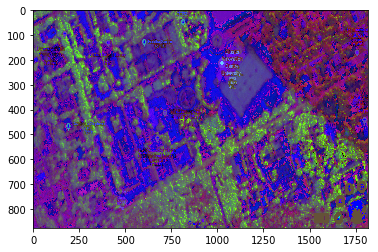

In [2]:
h_img=cv.imread('toogreen.png')
h_image = cv.cvtColor(h_img, cv.COLOR_BGR2HSV)
plt.imshow(h_image,aspect='auto')

# Chose a colour range specific to the colour of the trees in satellite images

In [3]:
#picked the colour range with help of paint to get accurate colours then used H+10 and H-10 as upper and lower bound.
lower_green = np.array([40,100,0],np.uint8)
upper_green = np.array([110,255,255],np.uint8)

In [4]:
mask = cv.inRange(h_image, lower_green, upper_green)
res = cv.bitwise_and(h_image,h_image, mask= mask)

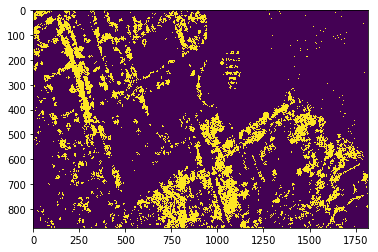

In [5]:
plt.imshow(mask,aspect='auto') 

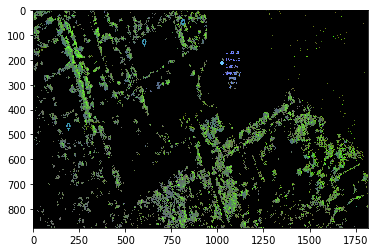

In [6]:
plt.imshow(res,aspect='auto') 

In [7]:
res2 =cv.cvtColor(res, cv.COLOR_BGR2GRAY)

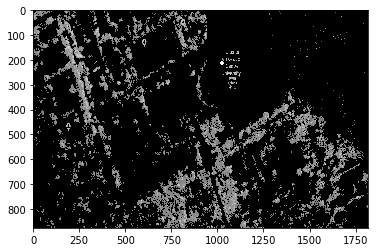

In [8]:
plt.imshow(res2,cmap="gray",aspect="auto")

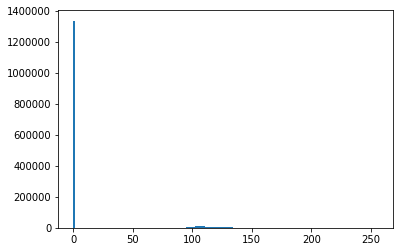

In [9]:
plt.hist(res2.ravel(),256,[0,256]); plt.show()

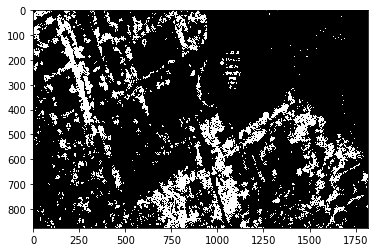

In [10]:
ret,thresh1 = cv.threshold(res2,90,255,cv.THRESH_BINARY)
plt.imshow(thresh1,'gray',aspect='auto')

In [11]:
cg=0
for row in range(len(thresh1)):
        for j in thresh1[row]:
            if j==255:
                cg+=1
                
print('Tree covered area=',cg/(thresh1.shape[0]*thresh1.shape[1]))         

Tree covered area= 0.15917575614571364


We can see a huge difference between the green/not concrete cover calculated in the other notebook(approx. 89-90%) to this notebook's tree cover approximation 16%. This helps us in differntiating the fields and lawns from trees.

# Water body detection: Google earth images

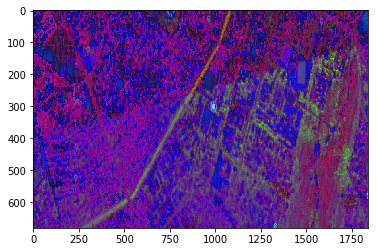

In [12]:
img=cv.imread('cic.png')
image = cv.cvtColor(img, cv.COLOR_BGR2HSV)
plt.imshow(image,aspect='auto')

In [13]:
lower_blue = np.array([100,80,0],np.uint8) 
upper_blue = np.array([180,255,255],np.uint8)

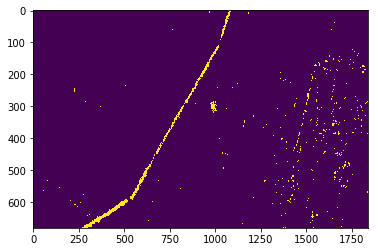

In [14]:
mask = cv.inRange(image, lower_blue, upper_blue)
res = cv.bitwise_and(image,image, mask= mask)
plt.imshow(mask,aspect='auto') 

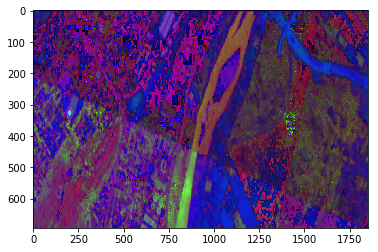

In [15]:
img1=cv.imread('earth.JPG')
image1 = cv.cvtColor(img1, cv.COLOR_BGR2HSV)
plt.imshow(image1,aspect='auto')

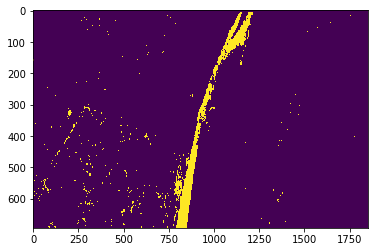

In [16]:
mask = cv.inRange(image1, lower_blue, upper_blue)
res = cv.bitwise_and(image1,image1, mask= mask)
plt.imshow(mask,aspect='auto') 

Outcome: Not entirely perfect but it seems to do the job to some extent. Some kind of blurring might help. To be tested.

# Road layout detection: Google earth images
# Work under progress

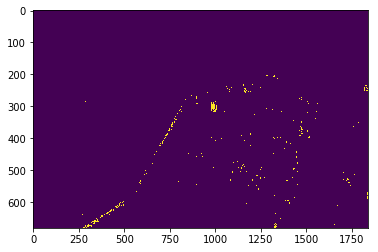

In [17]:
# lower_road = np.array([86,100,100],np.uint8) 
# upper_road = np.array([126,255,255],np.uint8)
# mask = cv.inRange(image, lower_road, upper_road)
# res = cv.bitwise_and(image,image, mask= mask)
# plt.imshow(mask,aspect='auto') 